In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
file_name = '5_robots_in_vertical_line'
df = pd.read_csv(f'data/{file_name}.csv')
df

,frame,time,robot_id,radius,x,y,velocity_x,velocity_y,speed,has_collided,pref_vel_x,pref_vel_y
0,0,0.0000,0,0.09,0.000000e+00,-0.00000,0.000000e+00,0.000000,0.000000e+00,-1,0.000000e+00,0.000000
1,0,0.0000,1,0.09,0.000000e+00,-0.22500,0.000000e+00,0.000000,0.000000e+00,-1,0.000000e+00,0.000000
2,0,0.0000,2,0.09,0.000000e+00,-0.45000,0.000000e+00,0.000000,0.000000e+00,-1,0.000000e+00,0.000000
3,0,0.0000,3,0.09,0.000000e+00,-0.67500,0.000000e+00,0.000000,0.000000e+00,-1,0.000000e+00,0.000000
4,0,0.0000,4,0.09,0.000000e+00,-0.90000,0.000000e+00,0.000000,0.000000e+00,-1,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2250,450,15.0001,0,0.09,2.062860e-05,-5.99996,5.670090e-05,0.000043,7.111030e-05,-1,-3.512140e-05,-0.000080
2251,450,15.0001,1,0.09,1.540000e-06,-6.22504,9.505880e-05,-0.000043,1.042970e-04,-1,3.052580e-06,0.000080
2252,450,15.0001,2,0.09,1.725990e-05,-6.44998,1.788800e-05,0.000029,3.374170e-05,-1,-3.123240e-05,-0.000043
2253,450,15.0001,3,0.09,4.665720e-06,-6.67503,4.760460e-05,-0.000029,5.554030e-05,-1,-5.770700e-06,0.000049


In [18]:
num_robots = df['robot_id'].max() + 1
max_time = df['time'].max()
max_speed = df['speed'].max()

<Figure size 432x288 with 0 Axes>

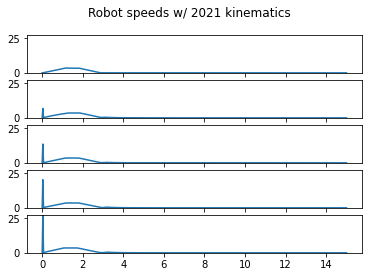

In [19]:
fig = plt.figure()

if num_robots > 1:
    fig, axs = plt.subplots(num_robots, sharex=True, sharey=True)
    fig.suptitle('Robot speeds w/ 2021 kinematics')

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    for robot_id, ax in enumerate(axs):
        ax.set_ylim([0, max_speed])
        robot = df[df['robot_id'] == robot_id]
        speed = robot['speed']
        ax.plot(time, speed)
else:
    fig.suptitle('Robot speeds w/ 2021 kinematics')
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, max_time), 
                                                  ylim=(0, max_speed * 1.25))

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    
    ax.set_ylim([-5, 5])
    robot = df
    speed = robot['velocity_x'] #['pref_vel_x'] #
    ax.plot(time, speed)


# Save plot
fig.savefig('plot/vel_w_kinematics.jpg', dpi=200)